# Exploratory Data Analysis (EDA)

In this notebook, we explore the cleaned credit card transaction data to uncover patterns in consumer behavior and fraud detection.

We'll investigate:
- When people spend the most
- Which locations see the highest transaction amounts
- Patterns in transaction size
- Day vs night transactions
- Differences in merchant categories
- Fraudulent vs non-fraudulent behavior


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the cleaned dataset
df = pd.read_csv("../data/cleansed/FraudTest_clean.csv")

# Quick check
df.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_lat,merch_long,is_fraud,hour,day,weekday,month,age,is_night,amount_bin
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.986391,-81.200714,0,12,21,6,6,52,False,very_low
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,39.450498,-109.960431,0,12,21,6,6,30,False,low
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.495810,-74.196111,0,12,21,6,6,50,False,low
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.812398,-80.883061,0,12,21,6,6,33,False,low
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.959148,-85.884734,0,12,21,6,6,65,False,very_low


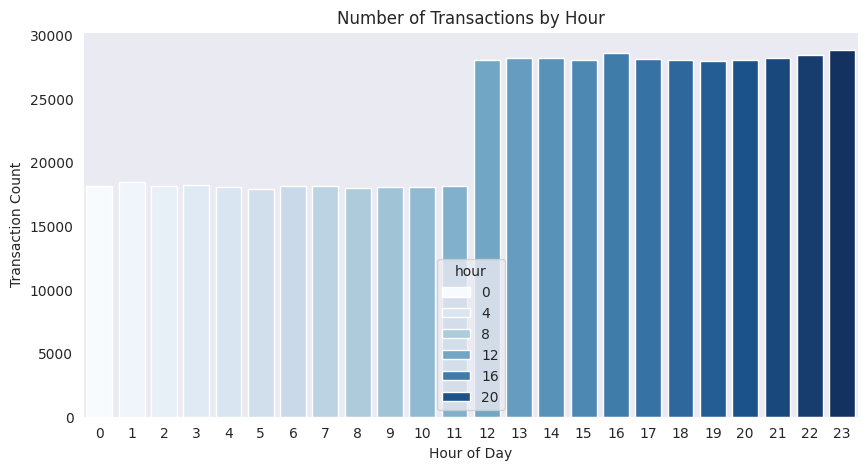

In [2]:
# Transactions by hour of day
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="hour", hue="hour", palette="Blues")
plt.title("Number of Transactions by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Transaction Count")
plt.grid(axis='y')
plt.show()


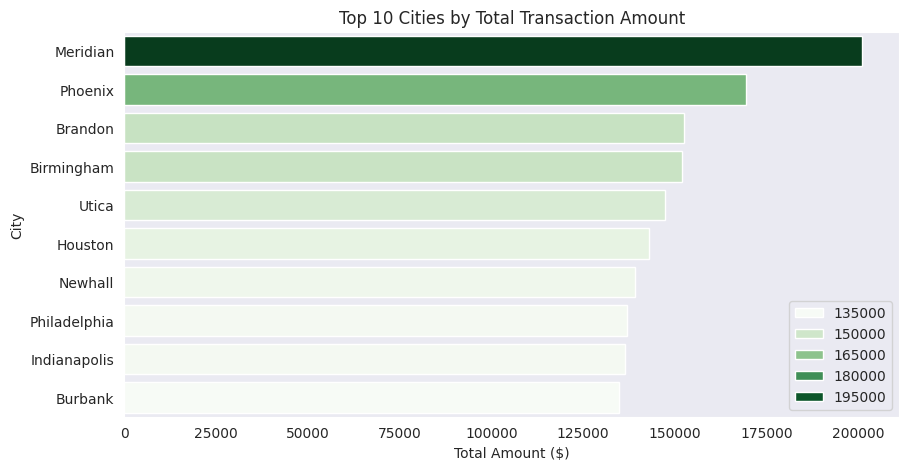

In [3]:
# Top 10 cities by total transaction amount
top_cities = df.groupby("city")["amt"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.values, y=top_cities.index, hue=top_cities.values, palette="Greens")
plt.title("Top 10 Cities by Total Transaction Amount")
plt.xlabel("Total Amount ($)")
plt.ylabel("City")
plt.grid(axis='x')
plt.show()

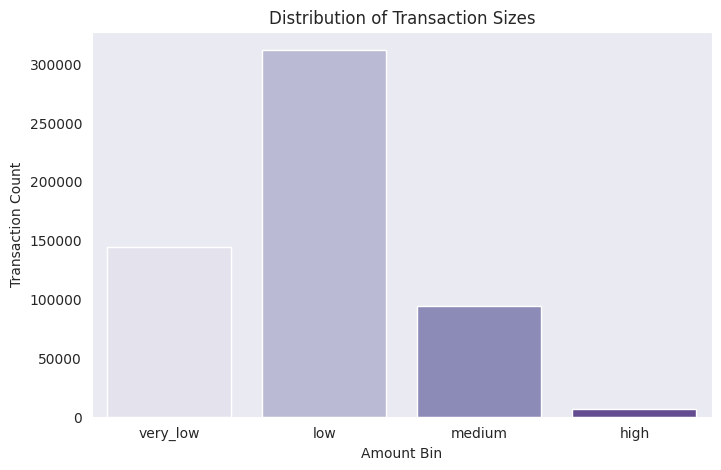

In [4]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="amount_bin", hue="amount_bin", palette="Purples")
plt.title("Distribution of Transaction Sizes")
plt.xlabel("Amount Bin")
plt.ylabel("Transaction Count")
plt.grid(axis='y')
plt.show()


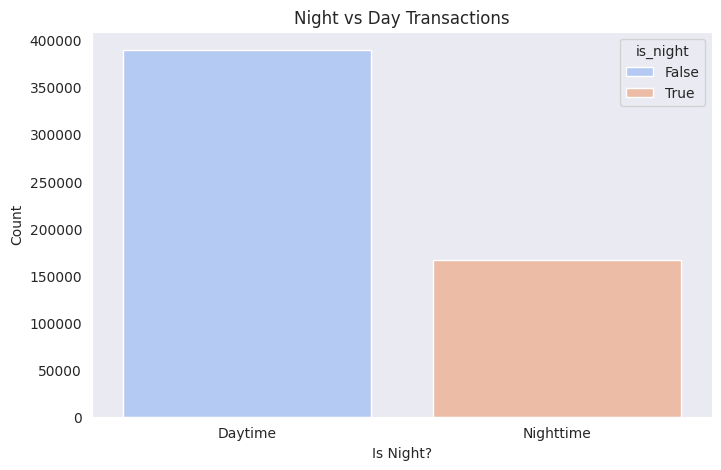

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="is_night", hue="is_night", palette="coolwarm")
plt.title("Night vs Day Transactions")
plt.xlabel("Is Night?")
plt.ylabel("Count")
plt.xticks([0,1], ["Daytime", "Nighttime"])
plt.grid(axis='y')
plt.show()


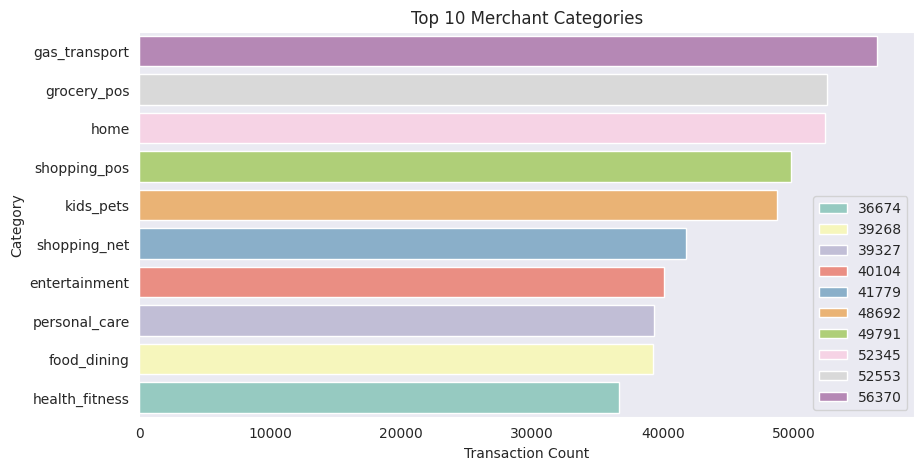

In [6]:
top_categories = df["category"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=top_categories.index, x=top_categories.values, hue=top_categories.values, palette="Set3")
plt.title("Top 10 Merchant Categories")
plt.xlabel("Transaction Count")
plt.ylabel("Category")
plt.grid(axis='x')
plt.show()


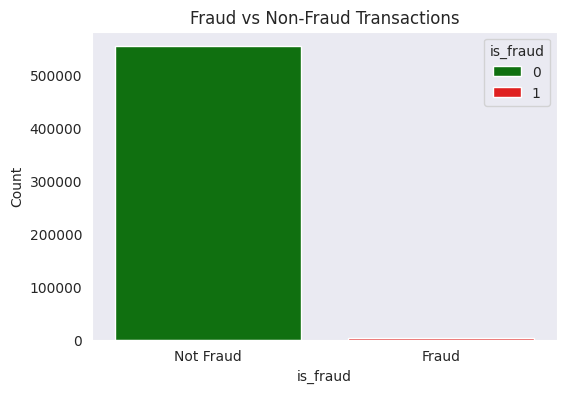

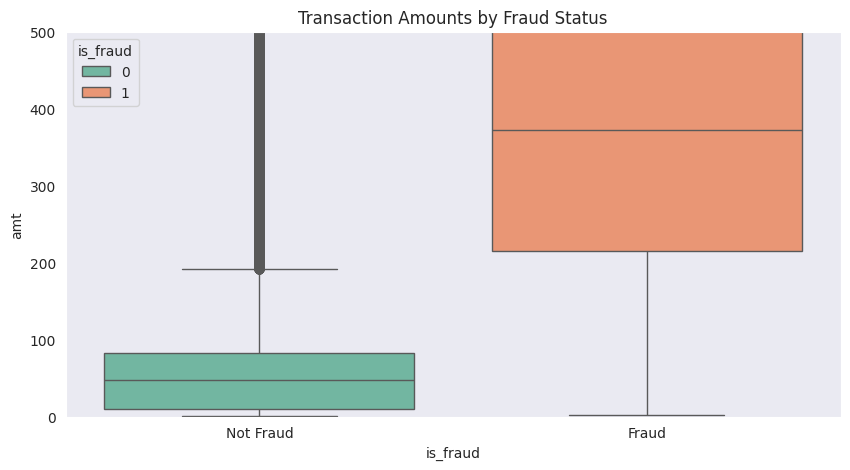

In [7]:
# Count of frauds
fraud_counts = df["is_fraud"].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, hue=fraud_counts.index, palette=["green", "red"])
plt.title("Fraud vs Non-Fraud Transactions")
plt.xticks([0,1], ["Not Fraud", "Fraud"])
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

# Compare fraud by amount
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="is_fraud", y="amt", hue="is_fraud", palette="Set2")
plt.title("Transaction Amounts by Fraud Status")
plt.xticks([0,1], ["Not Fraud", "Fraud"])
plt.ylim(0, 500)
plt.grid(axis='y')
plt.show()
